# US Accidents - EDA

## Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


%matplotlib inline

## Data Preparation

### Load dataset

In [2]:
data_df = pd.read_csv('data/us_accidents_dec19.csv')

In [3]:
data_df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
data_df.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.246264e+06,2.974335e+06,2.974335e+06,2.974335e+06,728071.000000,728071.000000,2.974335e+06,1.056730e+06,2.918272e+06,1.121712e+06,2.915162e+06,2.926193e+06,2.908644e+06,2.533495e+06,975977.000000
mean,2.078316e+02,2.360190e+00,3.649361e+01,-9.542625e+01,37.580871,-99.976032,2.855654e-01,5.837004e+03,6.235120e+01,5.132685e+01,6.540542e+01,2.983190e+01,9.150770e+00,8.298064e+00,0.020495
std,2.032959e+01,5.414733e-01,4.918849e+00,1.721881e+01,5.004757,18.416647,1.548392e+00,1.515928e+04,1.878855e+01,2.519127e+01,2.255676e+01,7.213808e-01,2.892114e+00,5.138546e+00,0.235770
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,24.570110,-124.497829,0.000000e+00,0.000000e+00,-7.780000e+01,-6.590000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.010000e+02,2.000000e+00,3.355040e+01,-1.172920e+02,33.957554,-118.286610,0.000000e+00,8.370000e+02,5.000000e+01,3.200000e+01,4.900000e+01,2.982000e+01,1.000000e+01,4.600000e+00,0.000000
50%,2.010000e+02,2.000000e+00,3.584969e+01,-9.025083e+01,37.903670,-96.631690,0.000000e+00,2.717000e+03,6.440000e+01,5.400000e+01,6.700000e+01,2.998000e+01,1.000000e+01,7.000000e+00,0.000000
75%,2.010000e+02,3.000000e+00,4.037026e+01,-8.091891e+01,41.372630,-82.323850,1.000000e-02,7.000000e+03,7.600000e+01,7.300000e+01,8.400000e+01,3.011000e+01,1.000000e+01,1.040000e+01,0.000000
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,49.075000,-67.109242,3.336300e+02,9.999997e+06,1.706000e+02,1.150000e+02,1.000000e+02,3.304000e+01,1.400000e+02,8.228000e+02,25.000000


In [5]:
data_df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

## Feature Cleaning

In [6]:
# TODO

## Feature Generation

In [7]:
# TODO

## EDA & Visualization

**State Wise Accidents Count**

In [32]:
state_accidents_count = data_df['State'].value_counts()
state_accidents_count_top_10 = state_accidents_count.iloc[:10]
state_accidents_count_non_top_10_others = {'Others': state_accidents_count.iloc[10:].values.sum()}
state_accidents_count_top_10_others_combined = state_accidents_count_top_10.append(pd.Series(state_accidents_count_non_top_10_others))

In [35]:
state_accidents_count_top_10_others_combined

CA         663204
TX         298062
FL         223746
SC         146689
NC         142460
NY         137799
PA          90395
MI          88694
IL          86390
GA          83620
Others    1013276
dtype: int64

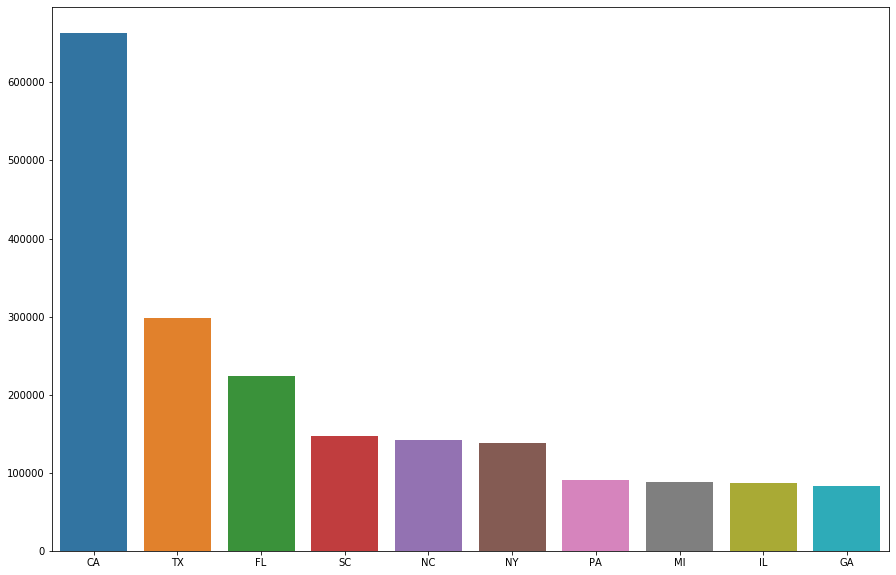

In [30]:
plt.figure(figsize=(15, 10))
sns.barplot(state_accidents_count_top_10.index, state_accidents_count_top_10.values)
plt.show()

In [22]:
fig = go.Figure(data=go.Choropleth(
    locations=state_accidents_count.index,
    z = state_accidents_count.values,
    locationmode = 'USA-states',
    colorscale = 'Blues',
    colorbar_title = "Accidents",
))
fig.update_layout(
    title_text = 'US Accidents',
    geo_scope='usa',
    width=900, height=700
)
fig.show()

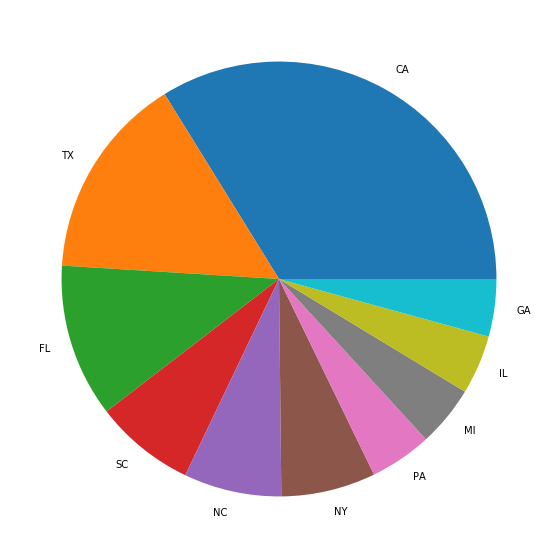

In [38]:
plt.figure(figsize=(15, 10))
plt.pie(state_accidents_count_top_10.values, labels=state_accidents_count_top_10.index)
plt.show()